In [1]:
from word2Vec import *

Kritkorn is loading Glove
Kritkorn finished loading Glove


In [275]:
import heapq
import matplotlib.pyplot as plt

In [103]:
import sys
sys.path.insert(0, '../models/research/slim/')
from datasets import imagenet

In [276]:
names = imagenet.create_readable_names_for_imagenet_labels()

def accuracy(threshold, testing_wnid='n02893608'):
    with open("available_hop2.txt","r") as testing_synsets:
        hop2_synset_ids = testing_synsets.read().split()
    label_pool = hop2_synset_ids

    probs_result_dir = "/Volumes/Kritkorn/results"
    words_result_dir = '/Volumes/Kritkorn/words'
    count_total = 0
    count_correct = 0
    for probs_file in os.listdir(probs_result_dir):
        if not probs_file.startswith(testing_wnid): # buskin
            continue
    #     print type(-probability_distribution)
        probability_distribution = np.loadtxt(os.path.join(probs_result_dir, probs_file))

    #     sorted_inds = [ind[0] for ind in sorted(enumerate(-probability_distribution), key=lambda x:x[1])]
    #     top_count = 5
    #     print('\nTop %d for %s' % (top_count, probs_file))
    #     for k in range(top_count):
    #         index = sorted_inds[k]
    #         print('Probability %0.2f%% => [%s]' % (probability_distribution[index] * 100, names[index]))

        probability_distribution = probability_distribution[1:]

        nns = nearest_neighbor_with_threshold(probability_distribution, 100, label_pool, threshold)
        if nns is None:
            continue
        nn_ids = [x[0] for x in nns]

#         print nn_ids[:5] # print top ids
#         print [x[1] for x in nns][:5] # print words

        count_total += 1
        if testing_wnid in nn_ids:
#             print "%s\t%d" % (probs_file, nn_ids.index(testing_wnid)) # print rank
            count_correct += 1
        if count_total % 100 == 0:
            print "%d %d" % (count_correct, count_total)
    return (count_correct, count_total)

In [272]:
accuracy(0.5)

19 100
40 200
56 300
74 400
92 500
110 600
129 700
140 800
159 900
180 1000
200 1100


(212, 1158)

In [273]:
accuracy(0.0)

27 100
54 200
83 300
110 400
138 500
165 600
197 700
219 800
247 900
278 1000
307 1100


(324, 1158)

In [274]:
accuracy(-0.5)

28 100
55 200
85 300
111 400
139 500
166 600
199 700
218 800
247 900
273 1000
304 1100


(320, 1158)

In [277]:
accuracy(0.9)

(0, 69)

In [286]:
accuracies_value

[0.2763385146804836,
 0.2763385146804836,
 0.2763385146804836,
 0.2763385146804836,
 0.27979274611398963,
 0.18393782383419688,
 0.18307426597582038,
 0.11042402826855123]

28 100
55 200
85 300
111 400
139 500
166 600
199 700
218 800
247 900
273 1000
304 1100
28 100
55 200
85 300
111 400
139 500
166 600
199 700
218 800
247 900
273 1000
304 1100
28 100
55 200
85 300
111 400
139 500
166 600
199 700
218 800
247 900
273 1000
304 1100
28 100
55 200
85 300
111 400
139 500
166 600
199 700
218 800
247 900
273 1000
304 1100
27 100
54 200
83 300
110 400
138 500
165 600
197 700
219 800
247 900
278 1000
307 1100
19 100
41 200
58 300
77 400
96 500
114 600
132 700
143 800
161 900
181 1000
201 1100
19 100
40 200
56 300
74 400
92 500
110 600
128 700
139 800
158 900
179 1000
199 1100
9 100
23 200
31 300
38 400
52 500
62 600
75 700
82 800
92 900
109 1000
120 1100


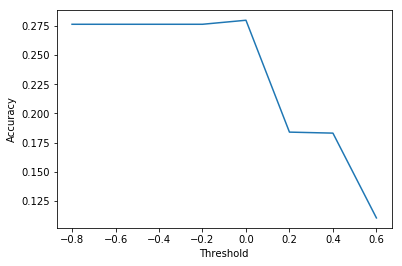

In [285]:
thresholds = np.arange(-0.8, 0.8, 0.2)
accuracies = [accuracy(threshold) for threshold in thresholds]
accuracies_value = [1.*x/y for x,y in accuracies]
plt.plot(thresholds, accuracies_value)
plt.xlabel("Threshold")
plt.ylabel("Accuracy")
plt.show()

In [246]:
similarity_score(get_vec('broom'), get_vec('grinder'), euclidean=False)

0.3853605122052256

In [3]:
a = probability_distribution[1:]

In [4]:
[i[0] for i in sorted(enumerate(-a), key=lambda x:x[1])]

[399,
 630,
 514,
 608,
 774,
 150,
 977,
 806,
 305,
 615,
 523,
 34,
 500,
 770,
 843,
 502,
 539,
 834,
 792,
 749,
 978,
 898,
 171,
 299,
 610,
 45,
 743,
 893,
 48,
 885,
 649,
 570,
 429,
 464,
 797,
 310,
 841,
 667,
 354,
 778,
 787,
 298,
 655,
 515,
 501,
 972,
 419,
 728,
 830,
 597,
 677,
 899,
 640,
 879,
 702,
 836,
 869,
 69,
 696,
 306,
 106,
 428,
 880,
 761,
 613,
 104,
 33,
 414,
 487,
 412,
 596,
 741,
 890,
 54,
 884,
 473,
 42,
 842,
 302,
 587,
 999,
 423,
 658,
 838,
 4,
 600,
 652,
 559,
 465,
 457,
 747,
 638,
 463,
 700,
 544,
 551,
 913,
 172,
 151,
 777,
 620,
 461,
 102,
 654,
 41,
 788,
 872,
 808,
 478,
 837,
 358,
 237,
 982,
 775,
 906,
 71,
 831,
 245,
 739,
 689,
 858,
 314,
 6,
 336,
 929,
 440,
 63,
 897,
 454,
 488,
 397,
 268,
 643,
 961,
 636,
 737,
 981,
 44,
 703,
 666,
 65,
 602,
 390,
 639,
 740,
 549,
 7,
 974,
 674,
 665,
 499,
 92,
 844,
 578,
 103,
 704,
 508,
 327,
 663,
 297,
 776,
 681,
 236,
 471,
 730,
 763,
 424,
 558,
 145,
 796,

In [7]:
probability_distribution[0] * (0 > 0)

0.0

In [25]:

def get_synthetic_vec(probability_distribution, T):
    '''
    Args:
        probability_distribution - a numpy array of size 1000 that represents the probability of being each label in 
                                   the training dataset
        T : the number of highest probability that we will take into account when contructing the synthetic word embedding
        
        # not using# id - the id of the test image
        # not using # dict_id_to_prob_dist_from_CNN - the dictionary that map image's id to the dictionary of probability distribution
    '''
    #probability_distribution = dict_id_to_prob_dist_from_CNN[image_id]

    # sorted_inds = [ind[0] for ind in sorted(enumerate(-probabilities), key=lambda x:x[1])]
    sorted_indices = [i[0] for i in sorted(enumerate(-np.array(probability_distribution)), key=lambda x:x[1])]
    
    highest_T_prediction = sorted_indices[:T]
    highest_T_probability = np.array([probability_distribution[highest_T_prediction[i]] for i in range(T)])
    word_embedding_vectors = list()
    for training_id in highest_T_prediction:
        synset_id = index_to_1k_id(training_id)
        one_word_rep = get_one_word(synset_id)[0]
        word_embedding_vectors.append(get_vec(one_word_rep))
    word_embedding_vectors = np.array(word_embedding_vectors)
    normalize_factor = np.sum(highest_T_probability)
    synthetic_word_embedding_vector = np.dot(highest_T_probability/normalize_factor, word_embedding_vectors)
    return synthetic_word_embedding_vector

In [9]:
new_prob_dist = [0.0, 5.9359947044868022e-05, 0.0, 0.0, 0.0, 0.00030838136444799602, 0.00050449889386072755, 0.00041339881136082113, 0.00024020244018174708, 0.00011523621651576832, 0.0, 0.0, 5.6997774663614109e-05, 0.00010950191062875092, 0.0, 5.8353332860860974e-05, 8.537078247172758e-05, 0.00016371006495319307, 0.00013533383025787771, 9.6306517662014812e-05, 4.8798970965435728e-05, 0.00011675487621687353, 0.0, 0.00033447783789597452, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.3882521721534431e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00024704550742171705, 5.511610652320087e-05, 0.00061703508254140615, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.1325299106538296e-05, 0.0, 0.0, 0.0, 0.0, 0.00026097087538801134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00027160046738572419, 0.0010339721338823438, 0.0, 0.00055109563982114196, 0.0, 0.0, 0.0, 0.0, 0.00035135040525346994, 0.0, 0.00015215085295494646, 0.0, 0.0, 0.0, 0.00013092003064230084, 0.0, 7.7655924542341381e-05, 0.00018479788559488952, 5.3978768846718594e-05, 0.0, 0.00019366394553799182, 0.0, 0.0, 0.00015685260586906224, 0.0, 0.00012500074808485806, 4.4697768316837028e-05, 0.0, 0.0001160772517323494, 0.0, 0.0, 6.268793367780745e-05, 0.0, 0.0, 0.00062705151503905654, 0.00038795743603259325, 0.00095065630739554763, 9.0474924945738167e-05, 0.00099362526088953018, 0.00018712821474764496, 0.00010098113125422969, 0.0, 0.0001061186267179437, 7.1551316068507731e-05, 0.00019229314057156444, 5.7340381317771971e-05, 0.00012876633263658732, 9.930397936841473e-05, 0.00013418252638075501, 5.3482141083804891e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7088857677881606e-05, 0.00014696226571686566, 0.0, 0.0, 0.0, 0.0, 3.4442393371136859e-05, 5.7096844102488831e-05, 0.0, 0.0, 0.0, 0.00010888870019698516, 1.3966146980237681e-05, 0.0, 0.0, 0.0, 0.0, 0.00013430094986688346, 3.1772422516951337e-05, 0.0, 6.0304562794044614e-05, 6.3022293034009635e-05, 0.0, 0.00021076622942928225, 0.0, 8.2552789535839111e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00012006429460598156, 0.0, 0.0, 0.0, 0.00021599004685413092, 0.0, 7.9270212154369801e-05, 0.0, 0.0, 0.0, 0.0, 0.00015463067393284291, 0.0, 0.0, 0.0, 0.00065351172816008329, 0.0, 8.5495245002675802e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1019993912195787e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010483165533514693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020852638408541679, 0.0, 0.00014112688950262964, 0.0, 0.00011650861415546387, 0.0, 0.00022128889395389706, 0.0, 0.0, 0.0, 0.00023147434694692492, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0898102674400434e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 6.134670547908172e-05, 0.0001492275478085503, 0.0, 0.0002259919565403834, 0.0, 6.7105058406013995e-05, 0.00021301246306393296, 0.0, 0.0, 0.0, 0.0, 0.0, 9.3959381047170609e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.2051178752444685e-05, 0.0001949161960510537, 8.0254249041900039e-05, 0.0, 0.00026387683465145528, 0.0, 0.0, 0.0, 0.0, 0.00016428154776804149, 0.0, 0.0, 0.0, 0.0, 0.0001697110419627279, 2.2908770915819332e-05, 8.3570877905003726e-05, 8.6750209447927773e-05, 0.00017913573537953198, 4.4513060856843367e-05, 9.455480903852731e-05, 0.0001215411612065509, 4.5790220610797405e-05, 0.0, 0.0, 0.0, 0.0013473816215991974, 0.0, 0.0, 0.00034969122498296201, 0.0, 0.0, 0.0, 0.0, 0.0, 9.6419920737389475e-05, 0.00013565266272053123, 8.8116707047447562e-05, 0.001448964118026197, 0.00011329482367727906, 0.00018824772268999368, 0.0, 0.00050664128502830863, 0.00010782527533592656, 0.0, 2.9131053452147171e-05, 5.0084188842447475e-05, 0.00020255257550161332, 8.9614433818496764e-05, 0.00010584003030089661, 6.6159700509160757e-05, 6.2318300479091704e-05, 0.0, 0.0, 0.00018690776778385043, 0.00038305565249174833, 0.0, 0.0, 0.00022838250151835382, 3.7115838495083153e-05, 0.0, 0.00015885742323007435, 0.00020334593136794865, 0.0, 0.00048938038526102901, 5.8708792494144291e-05, 0.0, 0.00010308229684596881, 0.00012299501395318657, 0.00033355248160660267, 0.00024292878515552729, 0.00028218890656717122, 0.00029470285517163575, 0.00023302022600546479, 0.0, 0.00017894279153551906, 3.3794614864746109e-05, 9.5371193310711533e-05, 0.0, 6.1803453718312085e-05, 3.6099518183618784e-05, 0.00016040106129366904, 0.0013978420756757259, 0.00016828365914989263, 0.00014588960038963705, 6.9333182182163e-05, 0.00058222230290994048, 0.0002312210708623752, 0.00010466093954164535, 6.1023565649520606e-05, 0.00013808328367304057, 0.00019315339159220457, 0.00020698799926321954, 6.3346895331051201e-05, 0.00034742354182526469, 9.89829859463498e-05, 8.9874061814043671e-05, 0.0, 0.0, 8.5206971562001854e-05, 0.0, 0.0002014862111536786, 0.00025324590387754142, 9.1659952886402607e-05, 0.0, 0.0, 6.3734478317201138e-05, 0.00011352026922395453, 7.5612006185110658e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00011471741163404658, 5.9042311477242038e-05, 0.0, 0.0004268205666448921, 0.0, 0.0, 0.0, 0.0, 0.0001672508951742202, 0.0, 0.00045951359788887203, 0.0, 0.19033908843994141, 0.0, 0.00024280998331960291, 0.0, 4.0111015550792217e-05, 0.00011250415263930336, 2.1107467546244152e-05, 0.00028220022795721889, 0.0001718744751997292, 6.729539018124342e-05, 0.0, 0.00017178524285554886, 0.00014936600928194821, 0.00093985325656831264, 0.0, 0.00094793632160872221, 0.00016815299750305712, 0.00020391511498019099, 1.8018808987108059e-05, 0.00017593307711649686, 0.0, 0.00020543439313769341, 0.0002066775195999071, 0.00017599281272850931, 0.0, 0.00036994699621573091, 6.8173540057614446e-05, 0.0, 0.00020055737695656717, 0.00099246413446962833, 0.001546708052046597, 0.00011432352039264515, 4.2325413232902065e-05, 0.00013576092896983027, 0.0, 0.0, 0.00012325817078817636, 7.6705953688360751e-05, 7.0154710556380451e-05, 5.8902944147121161e-05, 0.00010889430996030569, 0.0, 0.0, 0.0, 0.00016835925634950399, 0.00012172113201813772, 7.8374934673774987e-05, 8.5446859884541482e-05, 0.0002557530824560672, 0.0, 0.0, 3.9319558709394187e-05, 0.00012416573008522391, 8.1465681432746351e-05, 0.00014096299128141254, 0.00046934865531511605, 0.0, 0.00010788981307996437, 0.00069548416649922729, 0.00033153075492009521, 8.9570559794083238e-05, 0.00023033411707729101, 0.00063350651180371642, 0.00027082528686150908, 0.00068174354964867234, 0.0015379093820229173, 0.0, 7.1570153522770852e-05, 0.0, 0.00013012507406529039, 0.00014986340829636902, 7.7434473496396095e-05, 0.00037251831963658333, 3.2747680961620063e-05, 0.0, 0.00030095502734184265, 0.0, 4.3640695366775617e-05, 0.0, 0.00059289316413924098, 0.0, 0.0, 0.00031073926948010921, 0.0, 4.3926385842496529e-05, 0.00019714086374733597, 0.0, 0.00016563279496040195, 0.00094006472500041127, 0.00046814209781587124, 0.0, 0.00027495494578033686, 0.00022809102665632963, 0.00015782973787281662, 0.00018070574151352048, 5.0848993851104751e-05, 0.0, 0.0, 0.00015610206173732877, 7.5058727816212922e-05, 0.00039844101411290467, 0.0, 0.0013032042188569903, 0.0045658163726329803, 0.0, 0.0, 0.00010841310722753406, 0.00011930464097531512, 0.0, 0.00038308303919620812, 6.161183409858495e-05, 0.0, 4.2726995161501691e-05, 0.00019696203526109457, 0.00034593144664540887, 0.0, 0.0, 0.00010642505367286503, 3.6729143175762147e-05, 0.0, 9.2328336904756725e-05, 5.2831543143838644e-05, 0.0, 0.0, 0.013103589415550232, 0.00022358125715982169, 6.3509680330753326e-05, 0.00012293814506847411, 0.0, 0.0, 0.00019957960466854274, 0.0, 0.0, 0.00014964447473175824, 6.9757159508299083e-05, 7.8790530096739531e-05, 0.0, 5.8872505178442225e-05, 4.8680765758035704e-05, 0.00014094787184149027, 0.0, 0.0, 0.00021302048116922379, 0.00034812415833584964, 0.00022677892411593348, 0.0, 0.00022252870257943869, 0.0, 0.0, 0.0, 0.00041501718806102872, 0.0, 0.0, 0.00030910538043826818, 9.4587914645671844e-05, 0.0, 0.0, 0.0, 5.5708122090436518e-05, 0.00036902169813401997, 0.0, 0.0, 0.00019438947492744774, 3.7683759728679433e-05, 0.0, 0.0, 0.0, 0.00017450461746193469, 0.00016269186744466424, 0.0, 0.0, 0.0015601671766489744, 0.0, 0.00010936905164271593, 0.0, 0.0, 0.0, 0.00023735307331662625, 0.00013434354332275689, 0.00039081179420463741, 0.00027275396860204637, 0.00011201697634533048, 0.00016239169053733349, 5.1744307711487636e-05, 0.00013821233005728573, 0.0, 0.0, 0.0, 0.00077279773540794849, 0.00013173818297218531, 0.0, 0.0, 0.00020276478608138859, 0.0, 0.00028263250715099275, 7.980391092132777e-05, 2.2005071514286101e-05, 0.00091048842296004295, 0.0012353761121630669, 0.0, 0.00010620893590385094, 0.00072121067205443978, 0.00012686348054558039, 0.0, 0.0, 0.00013340712757781148, 0.0, 0.00019430569955147803, 0.0, 0.063151746988296509, 0.0002533534134272486, 0.0017925315769389272, 0.0, 0.00034102346398867667, 0.00098547921516001225, 0.00019969414279330522, 0.0, 0.00027823675191029906, 0.0, 0.00013658602256327868, 0.00021677750919479877, 0.000634213094599545, 4.7393263230333105e-05, 0.0, 0.0, 0.0001044905511662364, 0.0, 0.00025907336384989321, 0.00023627693008165807, 9.1087575128767639e-05, 0.00016528123524039984, 0.0, 0.00030207642703317106, 0.00028666268917731941, 0.00011663735494948924, 0.00015479970898013562, 0.0, 0.0, 0.00025000612367875874, 0.00069117208477109671, 0.00042557436972856522, 0.0, 0.0002703077916521579, 0.00011988592450506985, 0.00045523943845182657, 0.000152368433191441, 2.5798275601118803e-05, 0.00029855614411644638, 0.0, 0.0, 0.0, 0.00013581012899521738, 0.00020602074800990522, 0.0, 0.0, 0.0006196172907948494, 0.0013246213784441352, 9.1074842202942818e-05, 0.0001505005348008126, 0.00074922590283676982, 0.0, 0.0, 0.0, 7.0291062002070248e-05, 0.00038231717189773917, 6.9552523200400174e-05, 0.00039878141251392663, 0.00042839569505304098, 0.0014033738989382982, 0.00012421276187524199, 0.0, 0.00034184157266281545, 0.0, 0.0, 0.00011954911315115169, 0.00040156676550395787, 0.0, 9.5653012976981699e-05, 0.0012097175931558013, 0.0, 0.00015985452046152204, 0.00013729352212976664, 0.00037555641029030085, 0.00034985950333066285, 0.00032976790680550039, 0.0, 4.1474278987152502e-05, 0.0, 7.9206249210983515e-05, 4.7997946239775047e-05, 0.0, 0.0, 0.0, 0.0001560202072141692, 7.0853304350748658e-05, 0.00011995310342172161, 0.0003267792344558984, 0.0010198727250099182, 0.00022332947992254049, 7.4337694968562573e-05, 0.0, 0.0, 5.2765179134439677e-05, 0.0011175620602443814, 0.0, 0.0, 4.0211361920228228e-05, 0.00011921473196707666, 0.0, 9.3273934908211231e-05, 0.0, 0.0, 0.00010785937047330663, 0.0, 7.0804599090479314e-05, 0.00018236208416055888, 0.0, 0.0, 4.2268697143299505e-05, 0.0, 0.0, 0.0, 0.00032326026121154428, 0.0, 6.4072984969243407e-05, 0.00014494117931462824, 5.47099880350288e-05, 0.0001197561650769785, 0.0, 0.0, 0.0, 0.0003724412526935339, 0.00027317358762957156, 0.0, 0.0002080614649457857, 0.00012338148371782154, 0.00031722651328891516, 0.0, 0.0, 0.00016158775542862713, 0.0, 0.0, 0.0, 6.0056798247387633e-05, 0.0017426488921046257, 0.00014279992319643497, 6.0527021560119465e-05, 0.00022294037626124918, 0.0, 4.7440516937058419e-05, 0.0025075040757656097, 0.00016409905219916254, 7.5871357694268227e-05, 0.00017939123790711164, 0.00032161758281290531, 2.7837582820211537e-05, 0.0, 0.0, 0.0, 5.8956957218470052e-05, 0.0, 0.00018686561088543385, 0.00098743312992155552, 0.00014133060176391155, 0.00037102497299201787, 0.00025461462792009115, 0.00023573922226205468, 3.5944958653999493e-05, 0.00019102009537164122, 0.0, 0.00026344624347984791, 0.0, 0.00013814630801789463, 0.0, 0.0, 0.040721192955970764, 0.00056392780970782042, 0.00037905119825154543, 0.00063521764241158962, 0.0013690533814951777, 0.0, 2.5960376660805196e-05, 5.0690134230535477e-05, 0.00015524322225246578, 0.00011185359471710399, 0.00022653055202681571, 0.00015713737229816616, 0.0, 0.0013683615252375603, 0.0, 9.4632348918821663e-05, 0.0, 0.0, 0.0029783938080072403, 0.0, 0.0, 0.00032747321529313922, 0.0, 0.0, 0.0, 0.0, 0.00015157790039665997, 0.00028468313394114375, 0.00011909064778592438, 7.3835595685523003e-05, 0.0, 0.0, 0.021627707406878471, 0.0, 0.00059501104988157749, 0.0, 0.0, 0.0, 0.0, 0.00010670961637515575, 4.0440339944325387e-05, 0.0, 3.7014920962974429e-05, 0.0, 0.00025221719988621771, 0.00027734306058846414, 0.0, 0.0, 0.0, 8.6494117567781359e-05, 0.00031595403561368585, 0.0, 3.9083952287910506e-05, 0.00025560567155480385, 5.5667387641733512e-05, 8.4527477156370878e-05, 0.0012454951647669077, 0.0, 0.0, 5.7133991504088044e-05, 0.0030612410046160221, 0.00025087755057029426, 0.0010620503453537822, 0.00058459362480789423, 0.00074731418862938881, 0.0, 0.00013669887266587466, 0.0014333846047520638, 0.0, 0.004593702033162117, 0.00039151270175352693, 0.00022392821847461164, 0.0, 8.8666485680732876e-05, 0.0, 9.4300405180547386e-05, 0.00010683313303161412, 0.00024237108300440013, 0.0, 0.00034958150354214013, 0.0, 5.9334026445867494e-05, 7.0631343987770379e-05, 0.00026404549134895205, 0.0, 0.0001015397283481434, 0.0001934001047629863, 0.0, 6.2804734625387937e-05, 0.0, 0.00014100292173679918, 0.0, 7.7427052019629627e-05, 2.3045968191581778e-05, 0.00023686295025981963, 0.0, 0.00013174032210372388, 2.4972730898298323e-05, 0.00060290965484455228, 0.0, 0.0, 0.00011478695523692295, 0.00021186594676692039, 0.00023955378856044263, 0.0, 0.0011279782047495246, 0.00099117017816752195, 0.00013061267964076251, 0.00018885341705754399, 0.00016904028598219156, 0.00087302917381748557, 0.0016905923839658499, 0.0, 0.00022379575239028782, 0.0, 0.00023031632008496672, 0.00089380575809627771, 0.0, 0.0, 0.001726060057990253, 0.00012007338955299929, 0.00020261111785657704, 0.00015546611393801868, 0.00047033638111315668, 0.0, 0.0, 0.0, 0.0, 4.9924583436222747e-05, 6.0184254834894091e-05, 0.0, 0.0, 0.0, 0.0, 0.0003339954128023237, 0.00019536219770088792, 0.0, 0.00020657465211115777, 0.0, 0.0, 4.5316177420318127e-05, 0.00013555980694945902, 0.00025647741858847439, 0.0, 0.0, 0.0, 0.00018305497360415757, 0.0, 0.00011767732939915732, 7.9320539953187108e-05, 0.00012124872591812164, 2.4887402105377987e-05, 0.0, 0.0, 0.00017950453911907971, 0.00048840342788025737, 0.0, 0.00017025369743350893, 9.6754149126354605e-05, 2.0429244614206254e-05, 0.00014616952103096992, 0.0, 0.0, 6.6671222157310694e-05, 4.7968525905162096e-05, 8.4947823779657483e-05, 0.0, 0.0, 0.0, 0.00011135925160488114, 0.0, 0.0, 0.0, 4.3282132537569851e-05, 0.0, 0.00014065051800571382, 0.00018941501912195235, 0.00015569639799650759, 0.0001511377195129171, 0.00036275124875828624, 5.5068714573280886e-05, 0.00025726942112669349, 0.0, 0.0002071774797514081, 0.00019641328253783286, 0.00010508550622034818, 0.0, 0.00044781606993637979, 8.9888417278416455e-05, 3.20021717925556e-05, 7.9309276770800352e-05, 0.0001526114356238395, 0.0, 0.00027007731841877103, 0.00017022316751535982, 0.00011420066584832966, 0.0, 0.00024165009381249547, 0.0013018018798902631, 0.0, 0.00040509336395189166, 8.7955173512455076e-05, 0.00016316366964019835, 0.0, 0.002135994378477335, 4.9306767323287204e-05, 0.00017267507791984826, 0.00044226954923942685, 0.000566741859074682, 0.0, 6.8975241447333246e-05, 0.00010770225344458595, 0.0, 0.00033202563645318151, 0.00025149807333946228, 6.0512593336170539e-05, 7.435215957229957e-05, 0.0, 8.2108068454544991e-05, 0.0, 0.00012046709889546037, 0.00010356211714679375, 0.0, 9.115796274272725e-05, 3.9624126657145098e-05, 0.0]

In [16]:
[i[0] for i in sorted(enumerate(-1 * new_prob_dist), key=lambda x:x[1])]

[]

In [17]:
len(new_prob_dist)

1000

In [18]:
z = [0.0, 0.9, 0.0, 0.1]

In [23]:
- np.array(z)

array([-0. , -0.9, -0. , -0.1])

In [156]:
sorted([(4,'a'), (2,'b'), (3, 'c'), (3,'d')], reverse=True, key=lambda x:x[0])

[(4, 'a'), (3, 'c'), (3, 'd'), (2, 'b')]

In [152]:
for label_id in label_pool:
    names = id_labels[label_id]
    found_one_word = False
    for name in names:
        if valid_one_word(name):
            found_one_word = True
    if not found_one_word:
        print "%d %s" % (label_id, names)

In [169]:
def nearest_neighbor(label_pool, synthetic_vector, k=1):
    """
    Args:
        label pool - a list of synset id from which we want to predict; each synset id must have valid-one-word
        synthetic_vector - a numpy array representing the word embedding of an image
        k - we will return the synset ids that have k highest similarity -> will implement this later for performance reason
    """
#     highest_similarity = -10000
    similarities = []
    for label_id in label_pool:
        names = id_labels[label_id]
        nearest_label_id = None
        nearest_label_word = None
        highest_similarity = -1000
        for name in names:
            if valid_one_word(name):
                word_embed_name = get_vec(name)
                similarity = similarity_score(synthetic_vector, word_embed_name)
                if similarity > highest_similarity:
                    nearest_label_id = label_id
                    nearest_label_word = name
                    highest_similarity = similarity           
        similarities.append((nearest_label_id, nearest_label_word, highest_similarity))
    sorted_similarities = sorted(similarities, reverse=True, key=lambda x:x[2])
#     print "nearest_neighbor", len(sorted_similarities[:k]), len(set(sorted_similarities[:k]))
    return sorted_similarities[:k]

In [108]:
# Chang
def nearest_neighbor(label_pool, synthetic_vector, k):
    """
    Args:
        label pool - a list of synset id from which we want to predict; each synset id must have valid-one-word
        synthetic_vector - a numpy array representing the word embedding of an image
        k - we will return the synset ids that have k highest similarity
    """
    k_highest_similarity_labels = [(-1000,None)]*k
    heapq.heapify(k_highest_similarity_labels)
    for label_id in label_pool:
        names = id_labels[label_id]
        is_very_similar = False
        candidate_similarity = -1000
        for name in names:
            if valid_one_word(name):
                word_embed_name = get_vec(name)
                similarity = similarity_score(synthetic_vector, word_embed_name)
                if similarity > k_highest_similarity_labels[0][0]:
                    is_very_similar = True
                    candidate_similarity = max(similarity, candidate_similarity)
        if is_very_similar:
            heapq.heapreplace(k_highest_similarity_labels,(candidate_similarity, label_id))
    print k_highest_similarity_labels
    nearest_labels = list()
    for pair in k_highest_similarity_labels:
        nearest_labels.append(pair[1])
    return nearest_labels

In [42]:
len(probability_distribution)

1000

In [73]:
# syn_vec = get_synthetic_vec(probability_distribution, 1)
# print syn_vec
vec = get_vec("buskin") + 1.5 * get_vec("boot")
print vec

[-1.32836    -0.99674     0.593625   -0.870275   -1.388815   -0.487625
  0.738265   -0.8303      1.204402   -0.22229    -0.17535     0.8750765
 -0.892255    0.691815    0.202098    0.561855    0.21388065  0.126216
  0.85398    -0.61261    -0.53141    -1.14974    -0.31621     0.7526
 -0.749872   -0.887915   -1.402315   -0.366905    0.287865   -0.404095
  0.89115    -1.0442     -0.61485     1.51115     0.47518     2.67511
  0.550975    1.046275    1.309705   -1.51706     1.182455    0.70327
 -0.713755    1.117025    1.432525   -0.77393     2.60152    -2.579455
 -0.27444    -0.235574  ]


In [74]:
nearest_neighbor(label_pool, vec, 1)

['n02925666']

In [177]:
def max_similarity_score_vec_id(vec, label_id):
    max_similarity = -1000
    names = id_labels[label_id]
    for name in names:
        if valid_one_word(name):
            word_embed_name = get_vec(name)
            similarity = similarity_score(vec, word_embed_name)
            max_similarity = max(similarity, max_similarity)
    return max_similarity

In [270]:
def nearest_neighbor_with_threshold(probability_distribution, top_k, label_pool, threshold, T=10):

    synthetic_vector = get_synthetic_vec(probability_distribution, T)
    nearest_label_first_guess = nearest_neighbor(label_pool, synthetic_vector, 1)[0]
    first_guess_id, first_guess_name, first_guess_score = nearest_label_first_guess
    

    new_prob_dist = [probability_distribution[i] * (max_similarity_score_vec_id(get_vec(first_guess_name), index_to_1k_id(i)) > threshold)\
        for i in range(len(probability_distribution))]
    if sum(new_prob_dist) == 0:
        return None

    new_synthetic_vector = get_synthetic_vec(new_prob_dist, T)
    nearest_label_final_guesses = nearest_neighbor(label_pool, new_synthetic_vector, top_k)
#     final_guess_id = nearest_label_final_guess[2]
#     print max_similarity_score_vec_id(new_synthetic_vector, final_guess_id)
#     return [x[0] for x in nearest_label_final_guesses]
    return nearest_label_final_guesses

In [221]:
def similarity_score(this, that, normalized = True, euclidean=False):
    """
    Args:
        this - a numpy array representing the first vector 
        that - a numpy array representing the second vector 
        normalized - indicates if the score needs to be normalized
    """
    if euclidean:
        score = - np.linalg.norm(this - that)
        return score
    if normalized:
        score = np.dot(this, that)/(np.linalg.norm(this)*np.linalg.norm(that))
    else:
        score = np.dot(this, that)
    return score